# Week 1 : 

###### Data Exploration : 

(1) Perform descriptive analysis. Understand the variables and their corresponding values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hcd.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Stated that, on the columns below, a value of zero does not make sense and thus indicates missing value:

1. Glucose

2. BloodPressure

3. SkinThickness

4. Insulin

5. BMI

In [3]:
#Replacing 0 vales with nan
cols_with_null_as_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_null_as_zero] = df[cols_with_null_as_zero].replace(0, np.NaN)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(2) Visually explore these variables using histograms. Treat the missing values accordingly.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

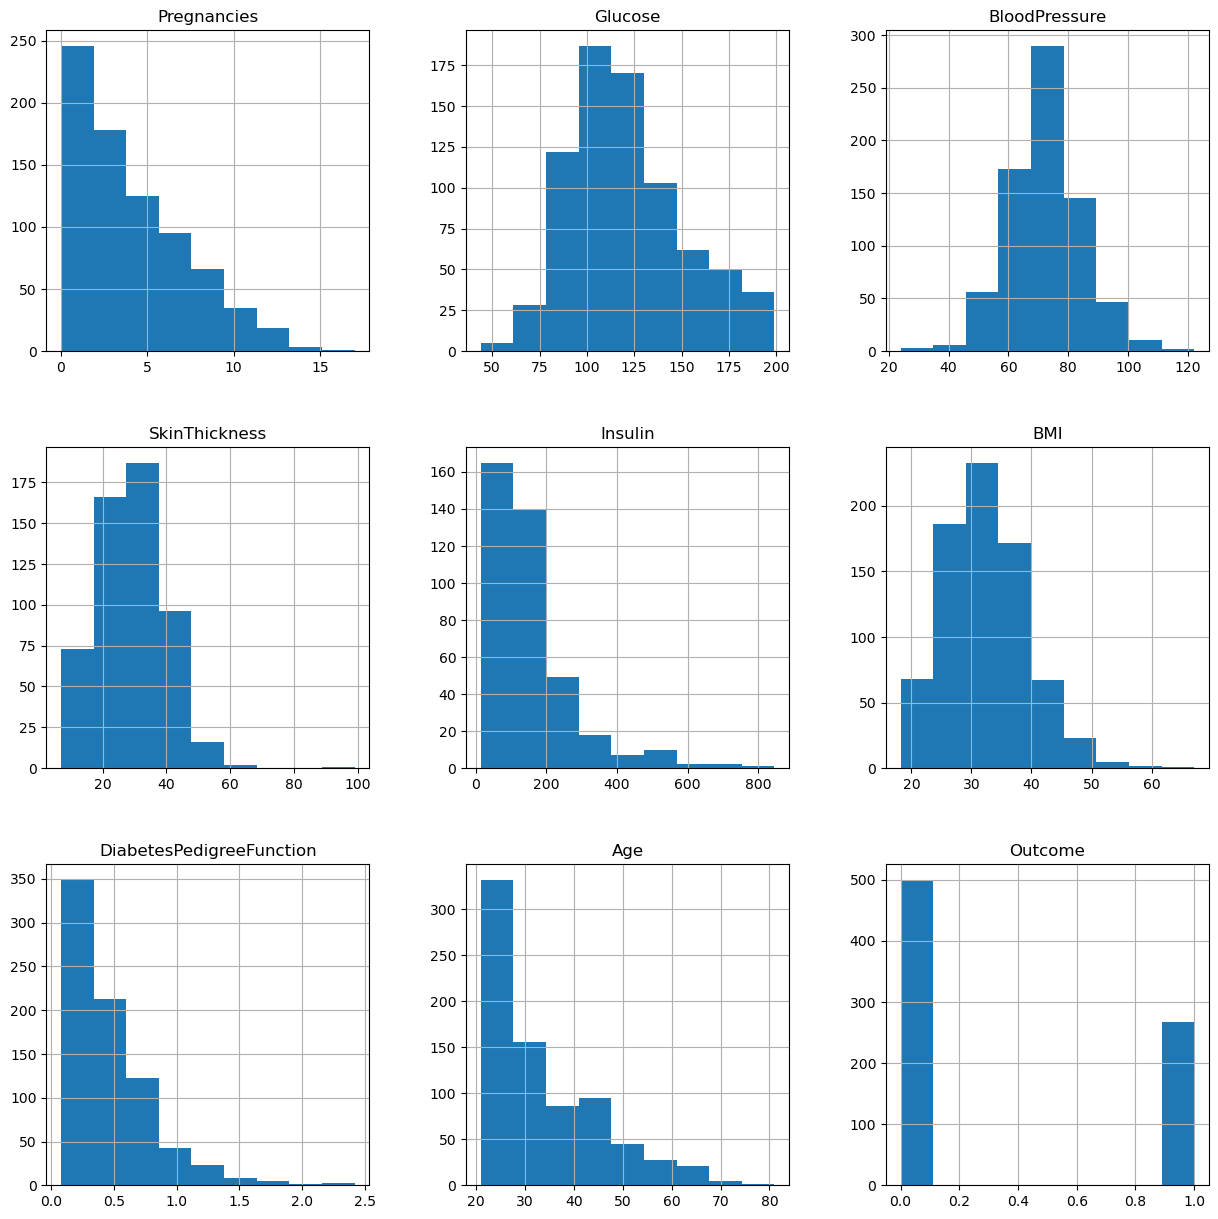

In [7]:
df.hist(bins=9, figsize=(15,15))

From above histograms, it is clear that Insulin has highly skewed data distribution and remaining 4 variables have relatively balanced data distribution therefore we will treat missing values in these 5 variables as below:-

1) Glucose - replace missing values with mean of values.
2) BloodPressure - replace missing values with mean of values.
3) SkinThickness - replace missing values with mean of values.
4) Insulin - replace missing values with median of values.
5) BMI - replace missing values with mean of values.

In [8]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [9]:
cols_mean_for_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[cols_mean_for_null] = df[cols_mean_for_null].fillna(df[cols_mean_for_null].mean())

(3) Create a count (frequency) plot describing the data types and the count of variables:

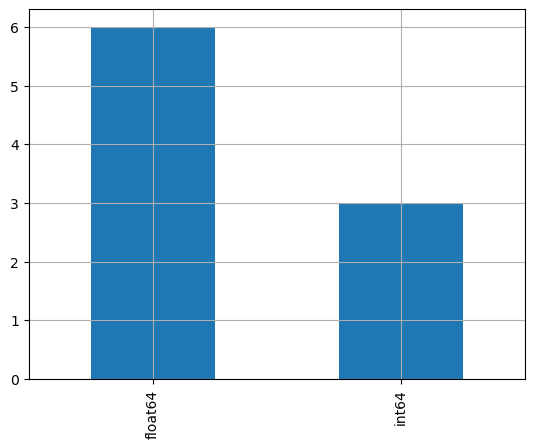

In [10]:
df.dtypes.value_counts().plot(kind='bar')
plt.grid()
plt.show()

###### Data Exploration

(4) Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action :

0    500
1    268
Name: Outcome, dtype: int64

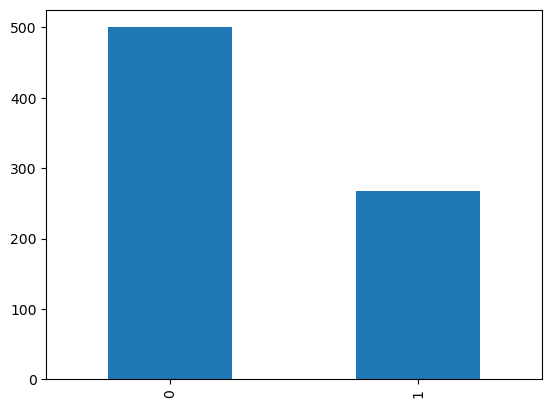

In [11]:
df['Outcome'].value_counts().plot(kind='bar')
df['Outcome'].value_counts()

Since classes in Outcome is little skewed so we will generate new samples using SMOTE (Synthetic Minority Oversampling Technique) for the class '1' which is under-represented in our data. We will use SMOTE out of many other techniques available since:

1) It generates new samples by interpolation.
2) It doesn't duplicate data.

In [12]:
# Defining independent variables
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47


In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
X.shape, y.shape

((768, 8), (768,))

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
X1, y1 = SMOTE(random_state=108).fit_resample(X, y)

In [18]:
X1.shape, y1.shape

((1000, 8), (1000,))

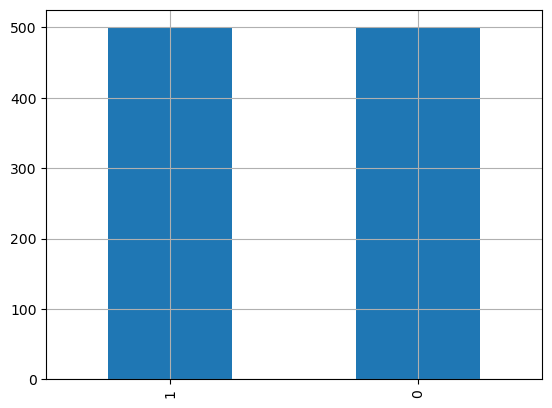

1    500
0    500
Name: Outcome, dtype: int64

In [19]:
y1.value_counts().plot(kind='bar')
plt.grid()
plt.show()
y1.value_counts()

(5) Create scatter charts between the pair of variables to understand the relationships. Describe your findings:

In [20]:
dfn = pd.concat([X1, y1], axis=1)
dfn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,3,164.686765,74.249021,29.153420,125.000000,42.767110,0.726091,29,1
996,0,138.913540,69.022720,27.713033,127.283849,39.177649,0.703702,24,1
997,10,131.497740,66.331574,33.149837,125.000000,45.820819,0.498032,38,1
998,0,105.571347,83.238205,29.153420,125.000000,27.728596,0.649204,60,1


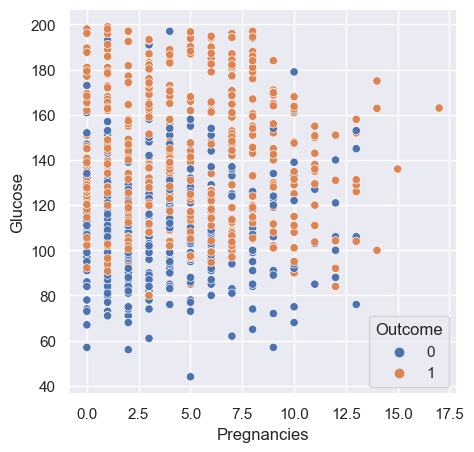

In [21]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x="Pregnancies", y="Glucose", data=dfn, hue="Outcome");

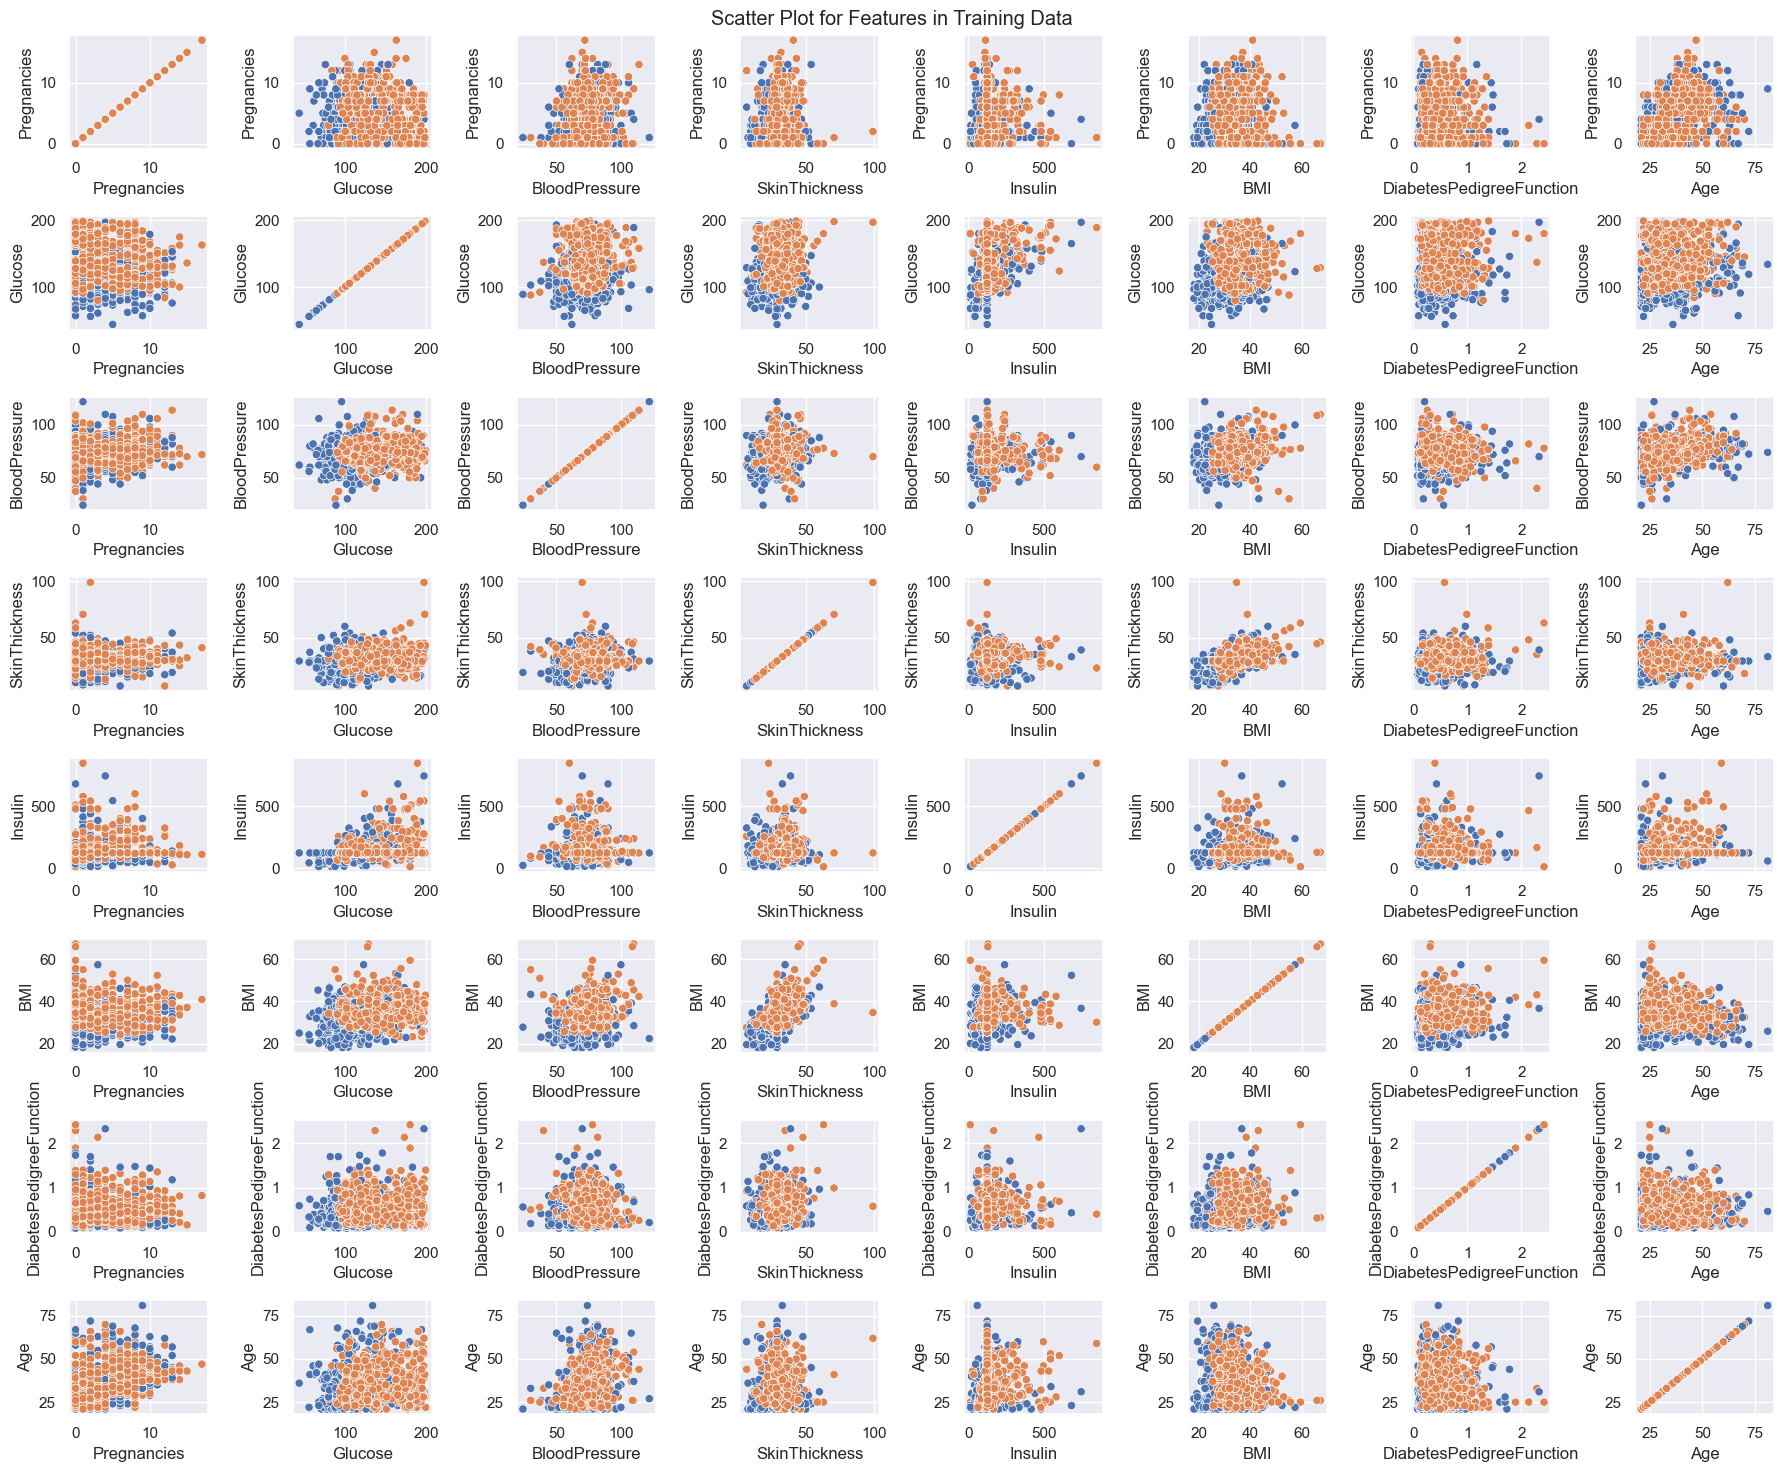

In [22]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot for Features in Training Data')

for i, col_y in enumerate(X1.columns):
    for j, col_x in enumerate(X1.columns):             
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=dfn, hue="Outcome", legend = False)

plt.tight_layout()

From the above scatter plot we can see that : 

1. Impressively effective in differentiating between the Outcome groups is glucose alone.
2. A certain degree of class distinction may also be made based just on age.
3. It appears that no pairings in the dataset can clearly differentiate between the various outcome groups.
4. To create a model for the prediction of classes in outcomes, we must combine many factors.

(6)  Perform correlation analysis. Visually explore it using a heat map :

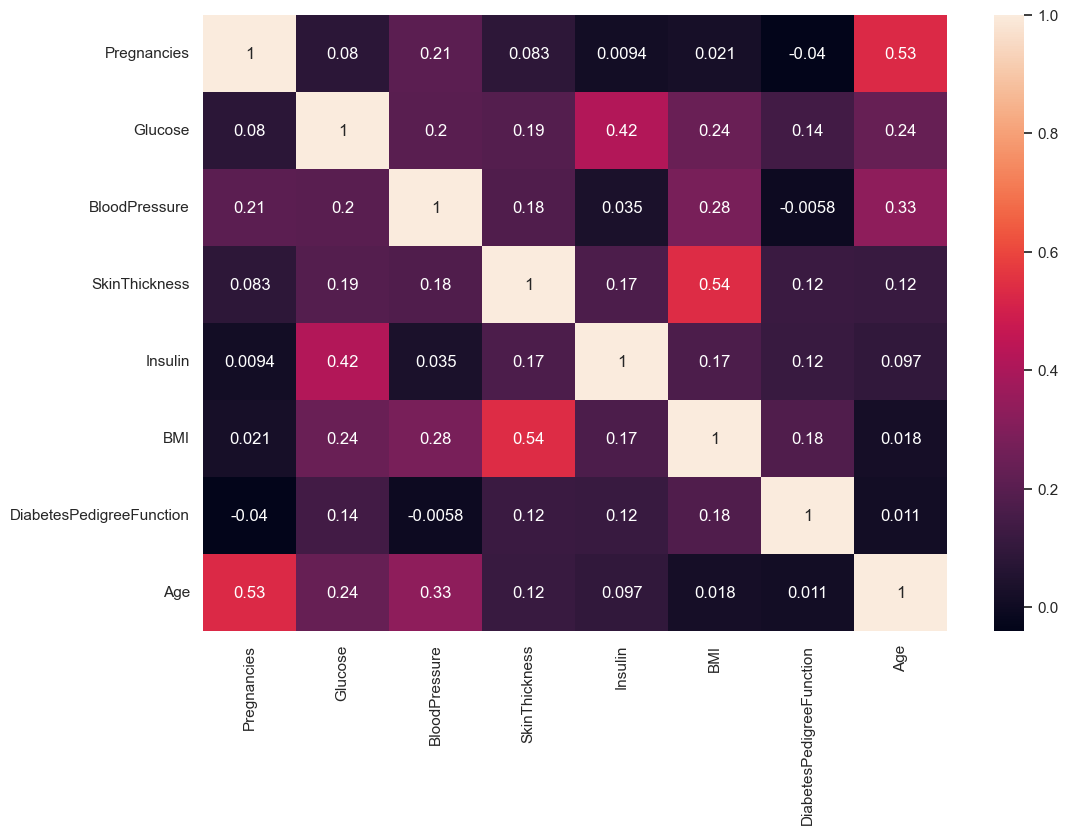

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(X1.corr(), annot=True);

Significant Correlation Present between the pairs :
1. Age - Pregnancies
2. BMI - Skin Thickness

No Negative Correlation present.

# Week 2 :

### Data Modelling :

(1) Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Answer : From the problem based statement we can conclude that this is a classification based problem, so we will use multiple popular algorithms and compare the accuracy and other parameters.We will be using :
1. Logistic Regression
2. Decision Tree
3. RandomForest Classifier
4. K-Nearest Neighbour (KNN)
5. Support Vector Machine (SVM)
6. Naive Bayes
7. Adaptive Boosting

In [24]:
# Train-Test split
from sklearn.model_selection import train_test_split, KFold

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state =6)

In [26]:
X_train.shape, X_test.shape

((800, 8), (200, 8))

In [27]:
y_train.shape, y_test.shape

((800,), (200,))

(2) Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [28]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

###### Knn

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Accuracy score for training dataset
knn.score(X_train, y_train)

0.88625

In [32]:
# Accuracy score for testing dataset
knn.score(X_test, y_test)

0.8

AUC: 0.843


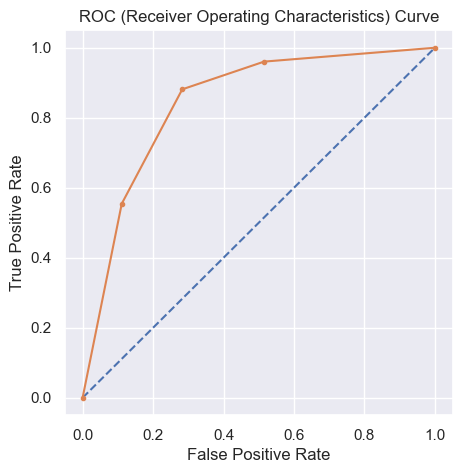

In [33]:
# ROC(Reciever Operating Characteristics curve)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = knn.predict_proba(X_test)             
probs = probs[:, 1]                             

auc_knn = roc_auc_score(y_test, probs)         
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')       
plt.plot(fpr, tpr, marker='.')                 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.817 auc_pr=0.849 ap=0.784


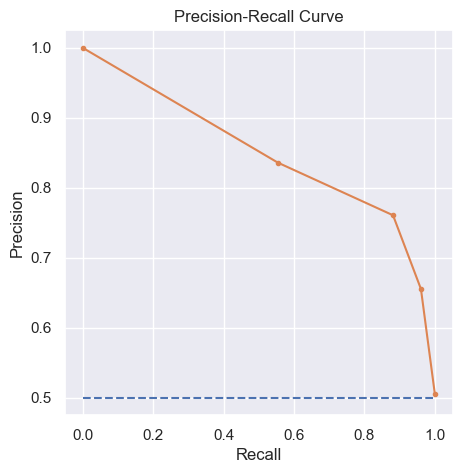

In [34]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
pred_test = knn.predict(X_test)                            
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_test)             
auc_knn_pr = auc(recall, precision)             
ap = average_precision_score(y_test, probs)     
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')   
plt.plot(recall, precision, marker='.')         
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [35]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, pred_test))
model_f1.append(f1)
model_auc.append(auc_knn)

###### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

In [37]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
# Training score
dtc.score(X_train,y_train)

1.0

In [39]:
# Testing score
dtc.score(X_test, y_test)

0.805

AUC: 0.805


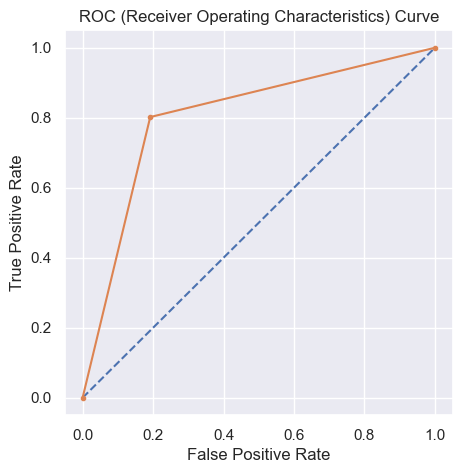

In [40]:
# ROC(Reciever Operating Characteristics curve)
probs = dtc.predict_proba(X_test)             
probs = probs[:, 1]                             

auc_dtc = roc_auc_score(y_test, probs)         
print('AUC: %.3f' %auc_dtc)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')       
plt.plot(fpr, tpr, marker='.')                 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.806 auc_pr=0.856 ap=0.750


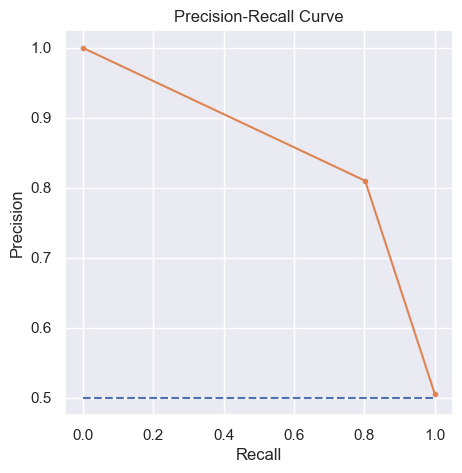

In [41]:
# Precision-Recall Curve
pred_test = dtc.predict(X_test)                            
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_test)             
auc_dtc_pr = auc(recall, precision)             
ap = average_precision_score(y_test, probs)     
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dtc_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')   
plt.plot(recall, precision, marker='.')         
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [42]:
models.append('DTC')
model_accuracy.append(accuracy_score(y_test, pred_test))
model_f1.append(f1)
model_auc.append(auc_dtc)

###### Logistic Regression :

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=300)

In [44]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [45]:
# Train score
lr.score(X_train,y_train)

0.73375

In [46]:
# Test score
lr.score(X_test, y_test)

0.75

AUC: 0.853


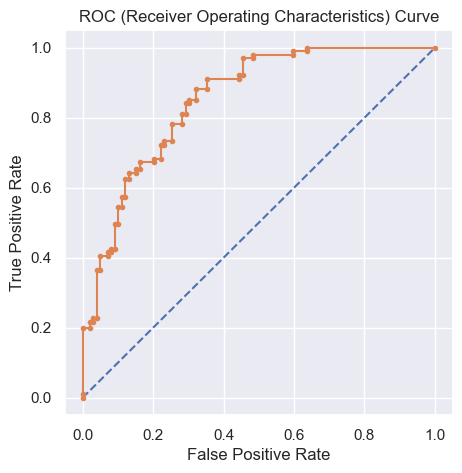

In [47]:
# ROC(Reciever Operating Characteristics curve)
probs = lr.predict_proba(X_test)             
probs = probs[:, 1]                             

auc_lr = roc_auc_score(y_test, probs)         
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')       
plt.plot(fpr, tpr, marker='.')                 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.752 auc_pr=0.842 ap=0.843


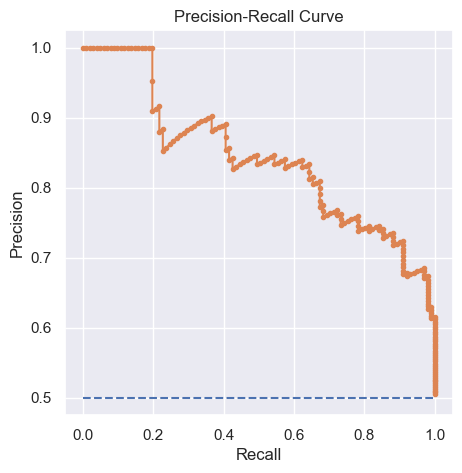

In [48]:
# Precision-Recall Curve
pred_test = lr.predict(X_test)                            
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_test)             
auc_lr_pr = auc(recall, precision)             
ap = average_precision_score(y_test, probs)     
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')   
plt.plot(recall, precision, marker='.')         
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [49]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, pred_test))
model_f1.append(f1)
model_auc.append(auc_lr)

###### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Train score
rf.score(X_train, y_train) 

1.0

In [53]:
# Test score
rf.score(X_test, y_test)

0.83

AUC: 0.906


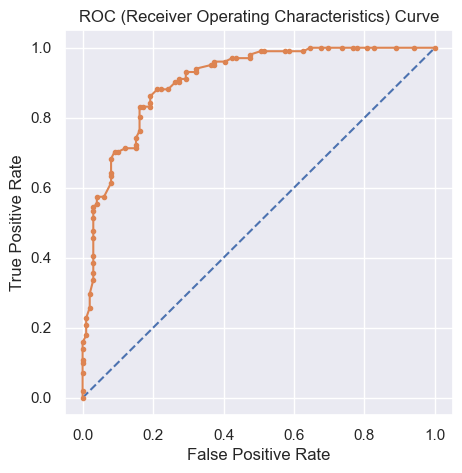

In [54]:
# ROC(Reciever Operating Characteristics curve)
probs = rf.predict_proba(X_test)             
probs = probs[:, 1]                             

auc_rf = roc_auc_score(y_test, probs)         
print('AUC: %.3f' %auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')       
plt.plot(fpr, tpr, marker='.')                 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.840 auc_pr=0.898 ap=0.897


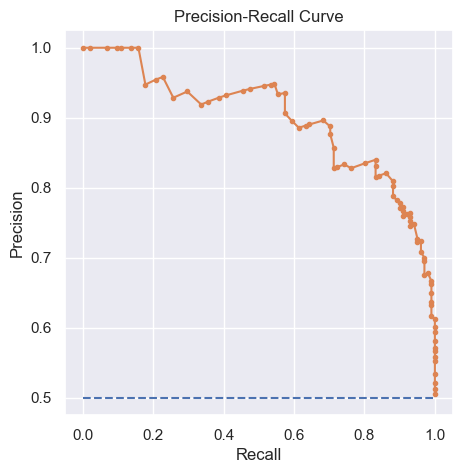

In [55]:
# Precision-Recall Curve
pred_test = rf.predict(X_test)                            
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_test)             
auc_rf_pr = auc(recall, precision)             
ap = average_precision_score(y_test, probs)     
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')   
plt.plot(recall, precision, marker='.')         
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [56]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, pred_test))
model_f1.append(f1)
model_auc.append(auc_rf)

###### SVM :

In [57]:
from sklearn.svm import SVC
svm = SVC(probability=True)

In [58]:
svm.fit(X_train, y_train)

SVC(probability=True)

In [59]:
# Train score
svm.score(X_train, y_train)

0.74

In [60]:
# Test score
svm.score(X_test, y_test)

0.73

AUC: 0.827


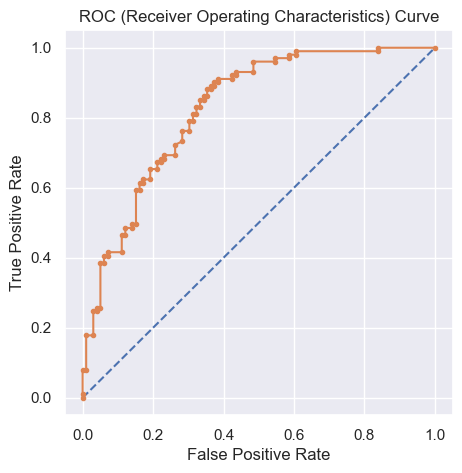

In [62]:
# ROC(Reciever Operating Characteristics curve)
probs = svm.predict_proba(X_test)             
probs = probs[:, 1]                             

auc_svm = roc_auc_score(y_test, probs)         
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')       
plt.plot(fpr, tpr, marker='.')                 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.730 auc_pr=0.810 ap=0.811


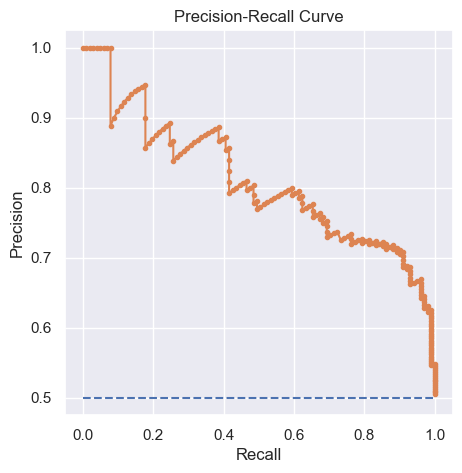

In [63]:
# Precision-Recall Curve
pred_test = svm.predict(X_test)                            
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_test)             
auc_svm_pr = auc(recall, precision)             
ap = average_precision_score(y_test, probs)     
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')   
plt.plot(recall, precision, marker='.')         
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [64]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, pred_test))
model_f1.append(f1)
model_auc.append(auc_svm)

###### Naive Bayes Algorithm :

In [65]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()

In [66]:
gnb.fit(X_train, y_train)

GaussianNB()

In [67]:
# Train score
gnb.score(X_train, y_train)

0.7275

In [68]:
# Test score
gnb.score(X_test, y_test)

0.75

AUC: 0.857


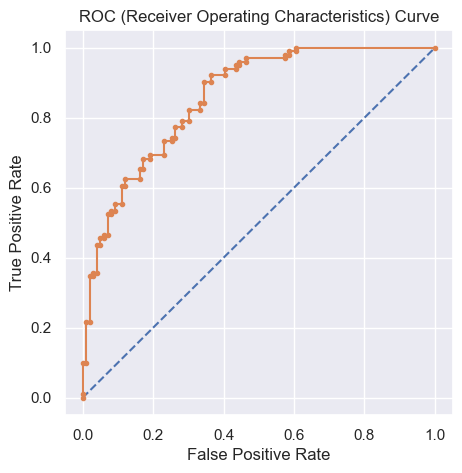

In [69]:
# ROC(Reciever Operating Characteristics curve)
probs = gnb.predict_proba(X_test)             
probs = probs[:, 1]                             

auc_gnb = roc_auc_score(y_test, probs)         
print('AUC: %.3f' %auc_gnb)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')       
plt.plot(fpr, tpr, marker='.')                 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.747 auc_pr=0.850 ap=0.851


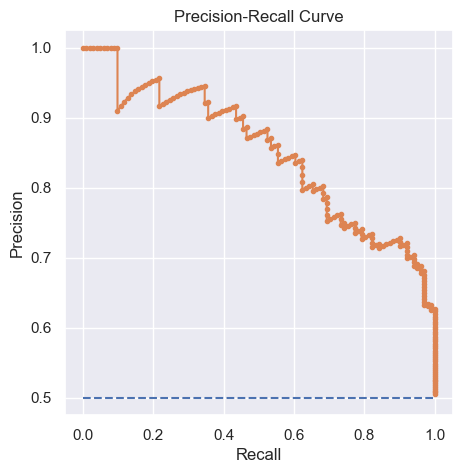

In [70]:
# Precision-Recall Curve
pred_test = gnb.predict(X_test)                            
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_test)             
auc_gnb_pr = auc(recall, precision)             
ap = average_precision_score(y_test, probs)     
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_gnb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')   
plt.plot(recall, precision, marker='.')         
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [71]:
models.append('GNB')
model_accuracy.append(accuracy_score(y_test, pred_test))
model_f1.append(f1)
model_auc.append(auc_gnb)

###### AdaBoost - Adaptive Boosting Classifier :

In [72]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)

In [73]:
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [74]:
# Train score
abc.score(X_train,y_train)  

0.8475

In [75]:
# Test score
abc.score(X_test, y_test)

0.79

AUC: 0.870


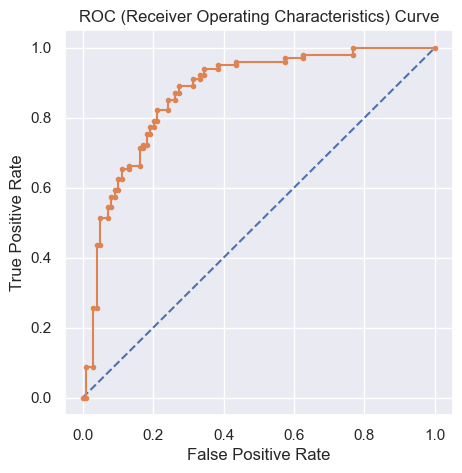

In [76]:
# ROC(Reciever Operating Characteristics curve)
probs = abc.predict_proba(X_test)             
probs = probs[:, 1]                             

auc_abc = roc_auc_score(y_test, probs)         
print('AUC: %.3f' %auc_abc)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')       
plt.plot(fpr, tpr, marker='.')                 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.790 auc_pr=0.823 ap=0.829


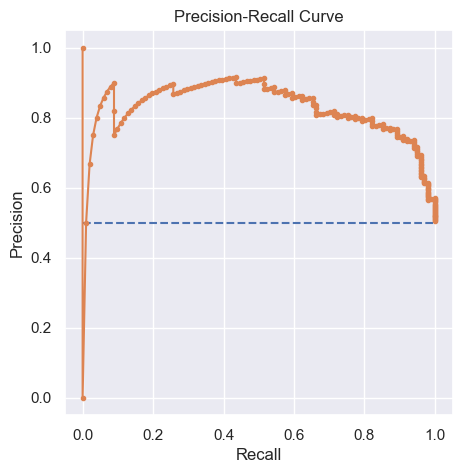

In [77]:
# Precision-Recall Curve
pred_test = abc.predict(X_test)                            
precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = f1_score(y_test, pred_test)             
auc_abc_pr = auc(recall, precision)             
ap = average_precision_score(y_test, probs)     
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_abc_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')   
plt.plot(recall, precision, marker='.')         
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [78]:
models.append('ABC')
model_accuracy.append(accuracy_score(y_test, pred_test))
model_f1.append(f1)
model_auc.append(auc_abc)

###### Model comparision :

(3) Compare various models with the results from KNN algorithm.

In [79]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

In [80]:
model_summary

,accuracy,f1_score,auc
model,,,
KNN,0.800,0.816514,0.843234
DTC,0.805,0.805970,0.805031
LR,0.750,0.752475,0.852585
RF,0.830,0.839623,0.906241
SVM,0.730,0.730000,0.827483
GNB,0.750,0.747475,0.857486
ABC,0.790,0.790000,0.870387


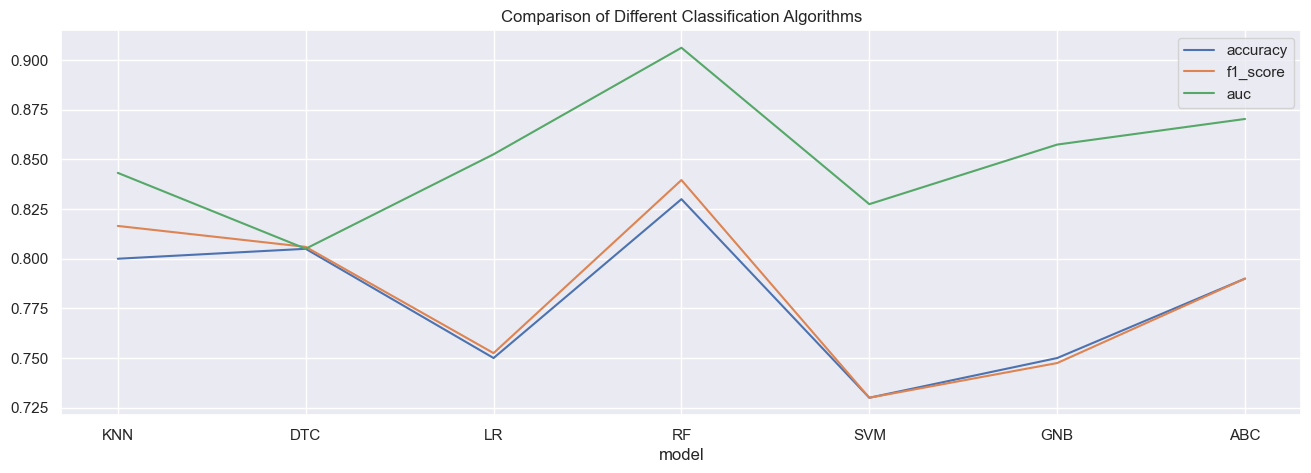

In [81]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms");

By comparing the values and by looking at the graph we can see that the RandomForest Classifier model performed the best out of all the models and as such we will make our final model based on that.

(4) Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

In [82]:
fm = rf

In [84]:
from sklearn.metrics import classification_report
report = classification_report(y_test, fm.predict(X_test))

In [85]:
print(report)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        99
           1       0.80      0.88      0.84       101

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



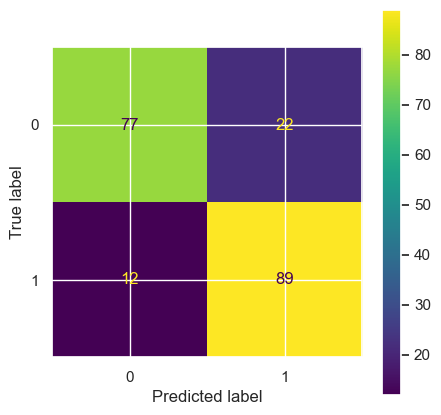

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, fm.predict(X_test))
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [88]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)

In [89]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_rf)

Accuracy: 0.830
Precision: 0.802
Sensitivity: 0.881
Specificity: 0.778
AUC: 0.906


Description of the variables :
1. TP : True Positive
2. TN : True Negative
3. FP : False Positive
4. FN : False Negative
5. cm : Confusion Matrix

Note : Sensitivity Score is also called Recall score.